In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\H.W\Desktop\Spark\Data 1.csv')
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
x = data.iloc[:,:-1].values  
y = data.iloc[:,1].values  

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
train_x.shape

(20, 1)

In [7]:
from sklearn.linear_model import LinearRegression  
Linear_regressor = LinearRegression()  
Linear_regressor.fit(train_x, train_y)

LinearRegression()

<ipython-input-8-777a61bddd07>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


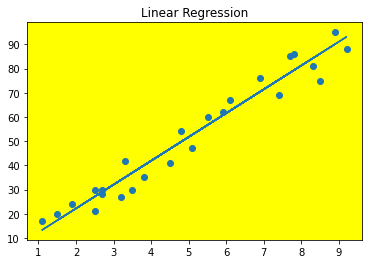

In [8]:
line = Linear_regressor.coef_*x+Linear_regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Linear Regression')
axes = plt.axes()
axes.set_facecolor("yellow")
plt.show()

In [9]:
print(test_x)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
y_pred = Linear_regressor.predict(test_x) 
df = pd.DataFrame({'Real Values':test_y,'Model Values':y_pred})
df.head(3)

,Real Values,Model Values
0,20,17.264777
1,27,34.008060
2,69,75.373818


In [11]:
dict={'Hours': [9.25]}
x_new = pd.DataFrame(dict)
my_pred = Linear_regressor.predict(x_new)
print("No of Hours = {}".format(dict['Hours']))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.59445001942248


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, y_pred))
print('Mean Square Error:',metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 4.080600155380033
Mean Square Error: 21.501864088809526
Root Mean Square Error: 4.63701025325689
